In [2]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
import seaborn as sn

/home/constantjunior/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import visualkeras

In [3]:
x_train_file = './data/train-images.idx3-ubyte'
x_test_file = './data/t10k-images.idx3-ubyte'
y_train_file = './data/train-labels.idx1-ubyte'
y_test_file = './data/t10k-labels.idx1-ubyte'

In [4]:
x_train = idx2numpy.convert_from_file(x_train_file)
x_test = idx2numpy.convert_from_file(x_test_file)
y_train = idx2numpy.convert_from_file(y_train_file)
y_test = idx2numpy.convert_from_file(y_test_file)

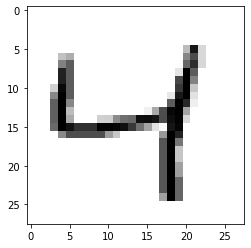

In [5]:
plt.imshow(x_train[2], cmap=plt.cm.binary)

Text(0.5, 1.0, 'Digit: 4')

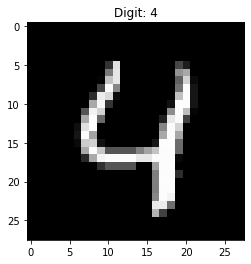

In [6]:
plt.imshow(x_test[4], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_test[4]))

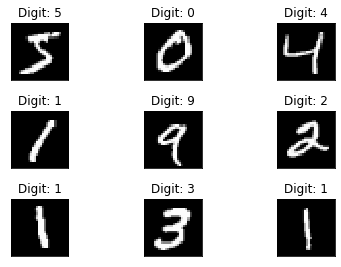

In [7]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])


Text(0.5, 1.0, 'Pixel Value Distribution')

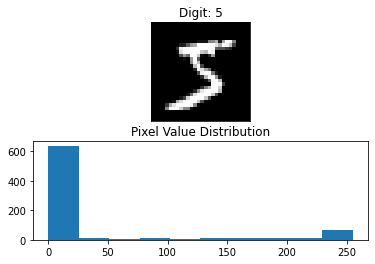

In [8]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")


In [10]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [11]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


## Model Sans BatchNormalization et Early stopping

In [12]:

# Model 1
model1 = Sequential()
model1.add(Dense(784, input_shape=(784,)))
model1.add(Dense(392,Activation('relu')))
model1.add(Dense(196,Activation('relu')))
model1.add(Dense(10,Activation('softmax')))
model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Model 2 
model2 = Sequential()
model2.add(Dense(784, input_shape=(784,)))
model2.add(Dense(392,Activation('relu')))
model2.add(Dense(196,Activation('softplus')))
model2.add(Dense(98,Activation('relu')))
model2.add(Dense(10,Activation('softmax')))
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Model 3

model3 = Sequential()
model3.add(Dense(784, input_shape=(784,)))
model3.add(Dense(392,Activation('relu')))
model3.add(Dense(196,Activation('elu')))
model3.add(Dense(190,Activation('relu')))
model3.add(Dense(19,Activation('softplus')))
model3.add(Dense(10,Activation('softmax')))
model3.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [13]:
model1.summary()
print("#################")
model2.summary()
print("#################")
model3.summary()
print("#################")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 392)               307720    
                                                                 
 dense_2 (Dense)             (None, 196)               77028     
                                                                 
 dense_3 (Dense)             (None, 10)                1970      
                                                                 
Total params: 1,002,158
Trainable params: 1,002,158
Non-trainable params: 0
_________________________________________________________________
#################
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense

In [14]:
# training the model and saving metrics in history
print("Model 1")
history_1 = model1.fit(x_train, y_train,batch_size=100, epochs=20,verbose=2,validation_data=(x_test, y_test))
print("Model 2")
history_2 = model2.fit(x_train, y_train,batch_size=100, epochs=20,verbose=2,validation_data=(x_test, y_test))
print("Model 3")
history_3 = model3.fit(x_train, y_train,batch_size=100, epochs=20,verbose=2,validation_data=(x_test, y_test))

Model 1
Epoch 1/20
600/600 - 39s - loss: 0.2116 - accuracy: 0.9345 - val_loss: 0.1305 - val_accuracy: 0.9610 - 39s/epoch - 64ms/step
Epoch 2/20
600/600 - 40s - loss: 0.1021 - accuracy: 0.9679 - val_loss: 0.0889 - val_accuracy: 0.9724 - 40s/epoch - 66ms/step
Epoch 3/20
600/600 - 39s - loss: 0.0788 - accuracy: 0.9749 - val_loss: 0.1026 - val_accuracy: 0.9679 - 39s/epoch - 65ms/step
Epoch 4/20
600/600 - 38s - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0915 - val_accuracy: 0.9730 - 38s/epoch - 64ms/step
Epoch 5/20
600/600 - 34s - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.1006 - val_accuracy: 0.9717 - 34s/epoch - 56ms/step
Epoch 6/20
600/600 - 33s - loss: 0.0513 - accuracy: 0.9835 - val_loss: 0.1139 - val_accuracy: 0.9699 - 33s/epoch - 56ms/step
Epoch 7/20
600/600 - 35s - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0854 - val_accuracy: 0.9776 - 35s/epoch - 58ms/step
Epoch 8/20
600/600 - 33s - loss: 0.0425 - accuracy: 0.9860 - val_loss: 0.0798 - val_accuracy: 0.9786 - 33s/epoch - 55

313/313 - 10s - loss: 0.1368 - accuracy: 0.9744 - 10s/epoch - 32ms/step
313/313 - 11s - loss: 0.0934 - accuracy: 0.9807 - 11s/epoch - 34ms/step
313/313 - 10s - loss: 0.0867 - accuracy: 0.9801 - 10s/epoch - 33ms/step


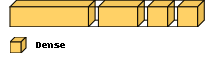

In [17]:
evaluation_1 =  model1.evaluate(x_test, y_test, verbose=2)
evaluation_2 =  model2.evaluate(x_test, y_test, verbose=2)
evaluation_3 =  model3.evaluate(x_test, y_test, verbose=2)
visualkeras.layered_view(model1, legend=True,)


In [ ]:
# print("Model 1 : Loss = {} , Accuracy = {}".format(evaluation_1[0],evaluation_1[1]))
# print(viz1)
# print("Model 2 : Loss = {} , Accuracy = {}".format(evaluation_2[0],evaluation_2[1]))
# print(viz2)
# print("Model 3 : Loss = {} , Accuracy = {}".format(evaluation_3[0],evaluation_3[1]))


Model 1


NameError: name 'history_1' is not defined

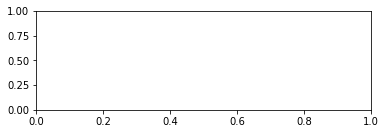

In [4]:
# plotting the metrics

print("Model 1")
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()




In [ ]:
print("Model 2")
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
print("Model 3")
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
# Prediction 1
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)
prediction_1 = np.argmax(pred1,axis=1)

In [ ]:
print("Model 1")
print(ConfusionMatrixDisplay.from_predictions(y_test, prediction_1))


In [ ]:
print(classification_report(y_test, prediction_1))

# Modele avec  BatchNormalization

In [ ]:
# Model with batch Normalization 
model_B = Sequential()
model_B.add(Dense(784, input_shape=(784,)))
model_B.add(BatchNormalization())
model_B.add(Dense(392,Activation('relu')))
model_B.add(BatchNormalization())
model_B.add(Dense(196,Activation('softplus')))
model_B.add(BatchNormalization())
model_B.add(Dense(98,Activation('relu')))
model_B.add(BatchNormalization())
model_B.add(Dense(10,Activation('softmax')))
model_B.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model_B.summary()

In [ ]:
visualkeras.layered_view(model_B, legend=True,)

In [ ]:
history_B = model_B.fit(x_train, Y_train,batch_size=100, epochs=20,verbose=2,validation_data=(x_test, Y_test))


In [ ]:
evaluation_B =  model_B.evaluate(x_test, Y_test, verbose=2)

In [ ]:

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_B.history['accuracy'])
plt.plot(history_B.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_B.history['loss'])
plt.plot(history_B.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
pred_B = model_B.predict(x_test)
prediction_B = np.argmax(pred_B,axis=1)

In [ ]:
print("Classification report Model Batch Normalization")
print(classification_report(y_test, prediction_B))

In [ ]:
print("Model 1")
print(ConfusionMatrixDisplay.from_predictions(y_test, prediction_B))


# Modele avec  BatchNormalization et Early stopping

In [ ]:
"""Construction du modele avec Batchnormalization et early stopping"""

In [ ]:
stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [ ]:
# Model with batch Normalization 
model_ES = Sequential()
model_ES.add(Dense(784, input_shape=(784,)))
model_ES.add(BatchNormalization())
model_ES.add(Dropout(0.2))
model_ES.add(Dense(392,Activation('relu')))
model_ES.add(BatchNormalization())
model_ES.add(Dropout(0.2))
model_ES.add(Dense(196,Activation('softplus')))
model_ES.add(BatchNormalization())
model_ES.add(Dropout(0.2))
model_ES.add(Dense(98,Activation('relu')))
model_ES.add(BatchNormalization())
model_ES.add(Dense(10,Activation('softmax')))
model_ES.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
print(model_ES.summary())
visualkeras.layered_view(model_ES, legend=True,)

In [ ]:
history_ES = model_ES.fit(x_train, Y_train,batch_size=100, epochs=20,verbose=2,validation_data=(x_test, Y_test),callbacks=[stopping])

In [ ]:
evaluation_ES =  model_ES.evaluate(x_test, Y_test, verbose=2)

In [ ]:

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_ES.history['accuracy'])
plt.plot(history_ES.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_ES.history['loss'])
plt.plot(history_ES.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
pred_ES = model_ES.predict(x_test)
prediction_ES = np.argmax(pred_ES,axis=1)

In [ ]:
print("Classification report Model Batch Normalization + Early Stopping")
print(classification_report(y_test, prediction_ES))

In [ ]:
print("Model 1")
print(ConfusionMatrixDisplay.from_predictions(y_test, prediction_ES))
